In [781]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [782]:
data=pd.read_csv('/content/HDFC.csv')

In [783]:
data.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2000-01-03,HDFC,EQ,271.75,293.5,293.50,293.5,293.5,293.50,293.50,22744,6.675364e+11,NaN,NaN,NaN
1,2000-01-04,HDFC,EQ,293.50,317.0,317.00,297.0,304.0,304.05,303.62,255251,7.749972e+12,NaN,NaN,NaN
2,2000-01-05,HDFC,EQ,304.05,290.0,303.90,285.0,295.0,292.80,294.53,269087,7.925368e+12,NaN,NaN,NaN
3,2000-01-06,HDFC,EQ,292.80,301.0,314.00,295.0,296.0,296.45,300.14,305916,9.181669e+12,NaN,NaN,NaN
4,2000-01-07,HDFC,EQ,296.45,290.0,296.35,281.0,287.1,286.55,288.80,197039,5.690480e+12,NaN,NaN,NaN




*   Volume,Turnover,Trades are the metrics indicating trading activity
*   Prev Close, Open, High, Low, Last, Close: Stock price data.


*   Deliverable Volume, %Deliverble: Indicators of stock deliverability.





In [784]:
data.shape

(5306, 15)

 Analyze the indicators in the dataset that best explain the volatility and
 unpredictable nature of the stocks in the last decade.



*  Calculating volatility metrics:High-low % range,Daily Change %




In [785]:
data['Date']=pd.to_datetime(data['Date'])

In [786]:
data.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2000-01-03,HDFC,EQ,271.75,293.5,293.50,293.5,293.5,293.50,293.50,22744,6.675364e+11,NaN,NaN,NaN
1,2000-01-04,HDFC,EQ,293.50,317.0,317.00,297.0,304.0,304.05,303.62,255251,7.749972e+12,NaN,NaN,NaN
2,2000-01-05,HDFC,EQ,304.05,290.0,303.90,285.0,295.0,292.80,294.53,269087,7.925368e+12,NaN,NaN,NaN
3,2000-01-06,HDFC,EQ,292.80,301.0,314.00,295.0,296.0,296.45,300.14,305916,9.181669e+12,NaN,NaN,NaN
4,2000-01-07,HDFC,EQ,296.45,290.0,296.35,281.0,287.1,286.55,288.80,197039,5.690480e+12,NaN,NaN,NaN


In [787]:
data['High-Low Range %'] = ((data['High'] - data['Low']) / data['Low']) * 100


In [788]:
data['Daily Change %'] = ((data['Close'] - data['Prev Close']) / data['Prev Close']) * 100


* Daily Change %: Indicates the percentage change in stock price from the previous close to the current close.
*  High-Low Range %:Represents the daily range as a percentage of the closing price.
The average daily range is approximately 3.54%, with a standard deviation of 2.55%.
Maximum observed daily range is 93.56%, suggesting highly volatile days.





In [789]:
df=data.loc[:,'Prev Close':]

In [790]:
df.head()

,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble,High-Low Range %,Daily Change %
0,271.75,293.5,293.50,293.5,293.5,293.50,293.50,22744,6.675364e+11,NaN,NaN,NaN,0.000000,8.003680
1,293.50,317.0,317.00,297.0,304.0,304.05,303.62,255251,7.749972e+12,NaN,NaN,NaN,6.734007,3.594549
2,304.05,290.0,303.90,285.0,295.0,292.80,294.53,269087,7.925368e+12,NaN,NaN,NaN,6.631579,-3.700049
3,292.80,301.0,314.00,295.0,296.0,296.45,300.14,305916,9.181669e+12,NaN,NaN,NaN,6.440678,1.246585
4,296.45,290.0,296.35,281.0,287.1,286.55,288.80,197039,5.690480e+12,NaN,NaN,NaN,5.462633,-3.339518


In [791]:
new_df=data[(data['Date']>'2014-12-01')& (data['Date']<'2024-12-02')]#dataset of last decade

In [792]:
new_df.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble,High-Low Range %,Daily Change %
3719,2014-12-02,HDFC,EQ,1137.55,1136.1,1137.50,1111.70,1121.0,1125.10,1124.97,1735746,1.952668e+14,82613.0,1239496.0,0.7141,2.320770,-1.094457
3720,2014-12-03,HDFC,EQ,1125.10,1122.5,1130.95,1099.50,1104.7,1104.60,1108.99,2620306,2.905887e+14,97390.0,1907443.0,0.7279,2.860391,-1.822060
3721,2014-12-04,HDFC,EQ,1104.60,1110.0,1116.65,1090.00,1113.0,1113.00,1101.12,2063649,2.272325e+14,84369.0,1323629.0,0.6414,2.444954,0.760456
3722,2014-12-05,HDFC,EQ,1113.00,1120.0,1122.65,1109.70,1114.9,1114.85,1115.04,1693044,1.887815e+14,79956.0,1162701.0,0.6868,1.166982,0.166217
3723,2014-12-08,HDFC,EQ,1114.85,1120.0,1128.80,1104.35,1106.0,1107.60,1115.85,1440243,1.607090e+14,65910.0,922160.0,0.6403,2.213972,-0.650312


In [793]:
df=new_df.loc[:,'Prev Close':]

In [794]:
df.corr()

,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble,High-Low Range %,Daily Change %
Prev Close,1.000000,0.999387,0.998090,0.998158,0.996804,0.996752,0.998090,0.189385,0.504795,0.377365,0.080762,-0.369068,-0.022795,-0.039647
Open,0.999387,1.000000,0.998549,0.998858,0.997411,0.997374,0.998696,0.189905,0.505613,0.377009,0.080267,-0.370481,-0.027266,-0.024878
High,0.998090,0.998549,1.000000,0.998154,0.998901,0.998875,0.999460,0.214153,0.527667,0.396940,0.097800,-0.383695,0.007926,0.009377
Low,0.998158,0.998858,0.998154,1.000000,0.998763,0.998805,0.999412,0.175294,0.493170,0.361429,0.066725,-0.365043,-0.051768,0.006767
Last,0.996804,0.997411,0.998901,0.998763,1.000000,0.999953,0.999525,0.196550,0.512207,0.379144,0.082988,-0.375683,-0.019358,0.037605
Close,0.996752,0.997374,0.998875,0.998805,0.999953,1.000000,0.999558,0.195477,0.511409,0.377887,0.081965,-0.375410,-0.020589,0.038757
VWAP,0.998090,0.998696,0.999460,0.999412,0.999525,0.999558,1.000000,0.195770,0.511737,0.379363,0.082738,-0.375257,-0.021117,0.017339
Volume,0.189385,0.189905,0.214153,0.175294,0.196550,0.195477,0.195770,1.000000,0.926484,0.848056,0.911915,-0.234289,0.631682,0.081796
Turnover,0.504795,0.505613,0.527667,0.493170,0.512207,0.511409,0.511737,0.926484,1.000000,0.856936,0.803944,-0.338014,0.536598,0.086120
Trades,0.377365,0.377009,0.396940,0.361429,0.379144,0.377887,0.379363,0.848056,0.856936,1.000000,0.714603,-0.314920,0.569526,0.019362


Correlation Analysis
High-Low Range %--



* Trades:Positive Correlation(0.569) between High-low range(%) and Trades
*  Volume:Positive Correlation(0.631).Increase in Volume lead to increase in Trades.  

*  Turnover:Positive Correlation(0.536).Increase in Turnover lead to increase in High-Low Range
*  Deliverable%:Negative Correlation(-0.300) between Deliverable Volume and High ow Range%








Daily Change % (Price Change Volatility):
* Turnover:Positive correlation(0.086) suggest a slight relationship between Turnover and Daily Change%.
* Trades: Positive correlation(0.019) suggest a slight relationship between Turnover and Daily Change%.

* Volume:Positive Correlation(0.081) suggest a positive relationship
*  Deliverable Volume:Positive Correlation(0.022)suggest a positive relationship between Deliverable Volume and Daily Change%.
   

Insights

1.  Trades and Volume are critical indicators of intraday volatility.
2.  Turnover slightly affects price volatility but has a stronger impact on intraday volatility.
3.%Deliverable inversely correlates with both volatility measures, potentially indicating that stocks with more speculative trading (lower deliverability) are more volatile

In [795]:
data.isnull().sum()

,0
Date,0
Symbol,0
Series,0
Prev Close,0
Open,0
High,0
Low,0
Last,0
Close,0
VWAP,0


In [796]:
for col in data.columns:
  if data[col].dtype=='int64' or data[col].dtype=='float64':
    data[col]=data[col].fillna(data[col].mean())

In [797]:
data.isna().sum()

,0
Date,0
Symbol,0
Series,0
Prev Close,0
Open,0
High,0
Low,0
Last,0
Close,0
VWAP,0


#Choose promising stock based on your analysis for your portfolio

In [798]:
data

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble,High-Low Range %,Daily Change %
0,2000-01-03,HDFC,EQ,271.75,293.50,293.50,293.50,293.50,293.50,293.50,22744,6.675364e+11,102159.051303,1.329440e+06,0.653088,0.000000,8.003680
1,2000-01-04,HDFC,EQ,293.50,317.00,317.00,297.00,304.00,304.05,303.62,255251,7.749972e+12,102159.051303,1.329440e+06,0.653088,6.734007,3.594549
2,2000-01-05,HDFC,EQ,304.05,290.00,303.90,285.00,295.00,292.80,294.53,269087,7.925368e+12,102159.051303,1.329440e+06,0.653088,6.631579,-3.700049
3,2000-01-06,HDFC,EQ,292.80,301.00,314.00,295.00,296.00,296.45,300.14,305916,9.181669e+12,102159.051303,1.329440e+06,0.653088,6.440678,1.246585
4,2000-01-07,HDFC,EQ,296.45,290.00,296.35,281.00,287.10,286.55,288.80,197039,5.690480e+12,102159.051303,1.329440e+06,0.653088,5.462633,-3.339518
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5301,2021-04-26,HDFC,EQ,2497.35,2500.00,2534.10,2483.20,2502.00,2509.80,2508.07,3916088,9.821805e+14,121028.000000,2.440395e+06,0.623200,2.049774,0.498528
5302,2021-04-27,HDFC,EQ,2509.80,2494.15,2526.80,2486.25,2514.00,2518.40,2509.18,2040799,5.120730e+14,102250.000000,1.040749e+06,0.510000,1.630970,0.342657
5303,2021-04-28,HDFC,EQ,2518.40,2516.10,2609.00,2508.30,2575.00,2577.00,2574.21,3407461,8.771527e+14,117425.000000,1.815110e+06,0.532700,4.014671,2.326874
5304,2021-04-29,HDFC,EQ,2577.00,2590.90,2628.00,2533.00,2539.70,2538.85,2569.65,3005468,7.722995e+14,132826.000000,1.472924e+06,0.490100,3.750493,-1.480404


In [799]:
data.columns

Index(['Date', 'Symbol', 'Series', 'Prev Close', 'Open', 'High', 'Low', 'Last',
       'Close', 'VWAP', 'Volume', 'Turnover', 'Trades', 'Deliverable Volume',
       '%Deliverble', 'High-Low Range %', 'Daily Change %'],
      dtype='object')

In [800]:
# Calculate summary statistics by stock
stock_analysis = data.groupby('Symbol').agg({
    'Daily Change %': ['mean', 'std', lambda x: (x > 0).sum() / len(x)],  # Mean, Std Dev, and Positive Return Frequency
    'High-Low Range %': ['mean'],                                           # Mean volatility
    'Volume': ['mean'],                                                   # Mean trading volume
    '%Deliverble': ['mean'],                                              # Mean deliverable percentage
    'VWAP': ['mean']                                                      # Average VWAP
})

# Flatten column names
stock_analysis.columns = [
    'Mean Return (%)', 'Return Std Dev (%)', 'Positive Return Frequency',
    'Mean Volatility (%)', 'Mean Volume', 'Mean Deliverable (%)', 'Mean VWAP'
]

# Define thresholds or scores for the criteria
stock_analysis['Consistency Score'] = stock_analysis['Positive Return Frequency'] * 100  # Positive return frequency as a percentage
stock_analysis['Moderate Volatility Score'] = -abs(stock_analysis['Mean Volatility (%)'] - stock_analysis['Mean Volatility (%)'].median())
stock_analysis['High Volume Score'] = stock_analysis['Mean Volume'] / stock_analysis['Mean Volume'].max() * 100  # Volume as a percentage of the max volume
stock_analysis['Trend Score'] = stock_analysis['Mean Deliverable (%)'] + stock_analysis['Mean VWAP']  # Simplified trend measure

# Combine scores for overall ranking
stock_analysis['Overall Score'] = (
    stock_analysis['Consistency Score'] +
    stock_analysis['Moderate Volatility Score'] +
    stock_analysis['High Volume Score'] +
    stock_analysis['Trend Score']
)

# Rank stocks based on the overall score
stock_analysis['Rank'] = stock_analysis['Overall Score'].rank(ascending=False)

# Select the top stocks based on overall rank
top_consistent_stocks = stock_analysis.sort_values('Rank').head(5).reset_index()

# Display the top stocks
print(top_consistent_stocks[['Symbol', 'Mean Return (%)', 'Positive Return Frequency',
                             'Mean Volatility (%)', 'Mean Volume',
                             'Mean Deliverable (%)', 'Mean VWAP', 'Overall Score']])


  Symbol  Mean Return (%)  Positive Return Frequency  Mean Volatility (%)  \
0   HDFC         0.085307                   0.503204             3.276267   

    Mean Volume  Mean Deliverable (%)    Mean VWAP  Overall Score  
0  1.848187e+06              0.653088  1283.664578    1434.638058  


In [801]:
data.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble,High-Low Range %,Daily Change %
0,2000-01-03,HDFC,EQ,271.75,293.5,293.50,293.5,293.5,293.50,293.50,22744,6.675364e+11,102159.051303,1.329440e+06,0.653088,0.000000,8.003680
1,2000-01-04,HDFC,EQ,293.50,317.0,317.00,297.0,304.0,304.05,303.62,255251,7.749972e+12,102159.051303,1.329440e+06,0.653088,6.734007,3.594549
2,2000-01-05,HDFC,EQ,304.05,290.0,303.90,285.0,295.0,292.80,294.53,269087,7.925368e+12,102159.051303,1.329440e+06,0.653088,6.631579,-3.700049
3,2000-01-06,HDFC,EQ,292.80,301.0,314.00,295.0,296.0,296.45,300.14,305916,9.181669e+12,102159.051303,1.329440e+06,0.653088,6.440678,1.246585
4,2000-01-07,HDFC,EQ,296.45,290.0,296.35,281.0,287.1,286.55,288.80,197039,5.690480e+12,102159.051303,1.329440e+06,0.653088,5.462633,-3.339518


In [802]:
data

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble,High-Low Range %,Daily Change %
0,2000-01-03,HDFC,EQ,271.75,293.50,293.50,293.50,293.50,293.50,293.50,22744,6.675364e+11,102159.051303,1.329440e+06,0.653088,0.000000,8.003680
1,2000-01-04,HDFC,EQ,293.50,317.00,317.00,297.00,304.00,304.05,303.62,255251,7.749972e+12,102159.051303,1.329440e+06,0.653088,6.734007,3.594549
2,2000-01-05,HDFC,EQ,304.05,290.00,303.90,285.00,295.00,292.80,294.53,269087,7.925368e+12,102159.051303,1.329440e+06,0.653088,6.631579,-3.700049
3,2000-01-06,HDFC,EQ,292.80,301.00,314.00,295.00,296.00,296.45,300.14,305916,9.181669e+12,102159.051303,1.329440e+06,0.653088,6.440678,1.246585
4,2000-01-07,HDFC,EQ,296.45,290.00,296.35,281.00,287.10,286.55,288.80,197039,5.690480e+12,102159.051303,1.329440e+06,0.653088,5.462633,-3.339518
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5301,2021-04-26,HDFC,EQ,2497.35,2500.00,2534.10,2483.20,2502.00,2509.80,2508.07,3916088,9.821805e+14,121028.000000,2.440395e+06,0.623200,2.049774,0.498528
5302,2021-04-27,HDFC,EQ,2509.80,2494.15,2526.80,2486.25,2514.00,2518.40,2509.18,2040799,5.120730e+14,102250.000000,1.040749e+06,0.510000,1.630970,0.342657
5303,2021-04-28,HDFC,EQ,2518.40,2516.10,2609.00,2508.30,2575.00,2577.00,2574.21,3407461,8.771527e+14,117425.000000,1.815110e+06,0.532700,4.014671,2.326874
5304,2021-04-29,HDFC,EQ,2577.00,2590.90,2628.00,2533.00,2539.70,2538.85,2569.65,3005468,7.722995e+14,132826.000000,1.472924e+06,0.490100,3.750493,-1.480404


 Feature engineer and build machine learning solutions for the business
 Requirements

In [803]:
data['Cumulative_Return'] = data['Close'] / data['Close'].iloc[0] - 1  #cumilative returns over a period


In [804]:
data['Volume_Change'] = data['Volume'].pct_change()


In [805]:
#Moving averages
data['SMA_50'] = data['Close'].rolling(window=50).mean()
data['SMA_200'] = data['Close'].rolling(window=200).mean()


In [806]:
data['Volatility'] = data['Daily Change %'].rolling(window=20).std()


In [807]:
data.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,...,Trades,Deliverable Volume,%Deliverble,High-Low Range %,Daily Change %,Cumulative_Return,Volume_Change,SMA_50,SMA_200,Volatility
0,2000-01-03,HDFC,EQ,271.75,293.5,293.50,293.5,293.5,293.50,293.50,...,102159.051303,1.329440e+06,0.653088,0.000000,8.003680,0.000000,NaN,NaN,NaN,NaN
1,2000-01-04,HDFC,EQ,293.50,317.0,317.00,297.0,304.0,304.05,303.62,...,102159.051303,1.329440e+06,0.653088,6.734007,3.594549,0.035945,10.222784,NaN,NaN,NaN
2,2000-01-05,HDFC,EQ,304.05,290.0,303.90,285.0,295.0,292.80,294.53,...,102159.051303,1.329440e+06,0.653088,6.631579,-3.700049,-0.002385,0.054205,NaN,NaN,NaN
3,2000-01-06,HDFC,EQ,292.80,301.0,314.00,295.0,296.0,296.45,300.14,...,102159.051303,1.329440e+06,0.653088,6.440678,1.246585,0.010051,0.136867,NaN,NaN,NaN
4,2000-01-07,HDFC,EQ,296.45,290.0,296.35,281.0,287.1,286.55,288.80,...,102159.051303,1.329440e+06,0.653088,5.462633,-3.339518,-0.023680,-0.355905,NaN,NaN,NaN


In [808]:
data['Target_Close'] = data['Close'].shift(-1)


In [809]:
data.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,...,Deliverable Volume,%Deliverble,High-Low Range %,Daily Change %,Cumulative_Return,Volume_Change,SMA_50,SMA_200,Volatility,Target_Close
0,2000-01-03,HDFC,EQ,271.75,293.5,293.50,293.5,293.5,293.50,293.50,...,1.329440e+06,0.653088,0.000000,8.003680,0.000000,NaN,NaN,NaN,NaN,304.05
1,2000-01-04,HDFC,EQ,293.50,317.0,317.00,297.0,304.0,304.05,303.62,...,1.329440e+06,0.653088,6.734007,3.594549,0.035945,10.222784,NaN,NaN,NaN,292.80
2,2000-01-05,HDFC,EQ,304.05,290.0,303.90,285.0,295.0,292.80,294.53,...,1.329440e+06,0.653088,6.631579,-3.700049,-0.002385,0.054205,NaN,NaN,NaN,296.45
3,2000-01-06,HDFC,EQ,292.80,301.0,314.00,295.0,296.0,296.45,300.14,...,1.329440e+06,0.653088,6.440678,1.246585,0.010051,0.136867,NaN,NaN,NaN,286.55
4,2000-01-07,HDFC,EQ,296.45,290.0,296.35,281.0,287.1,286.55,288.80,...,1.329440e+06,0.653088,5.462633,-3.339518,-0.023680,-0.355905,NaN,NaN,NaN,287.20


Mean Squared Error: 1232.1847985303339
R2 Score: 0.9974068260569932


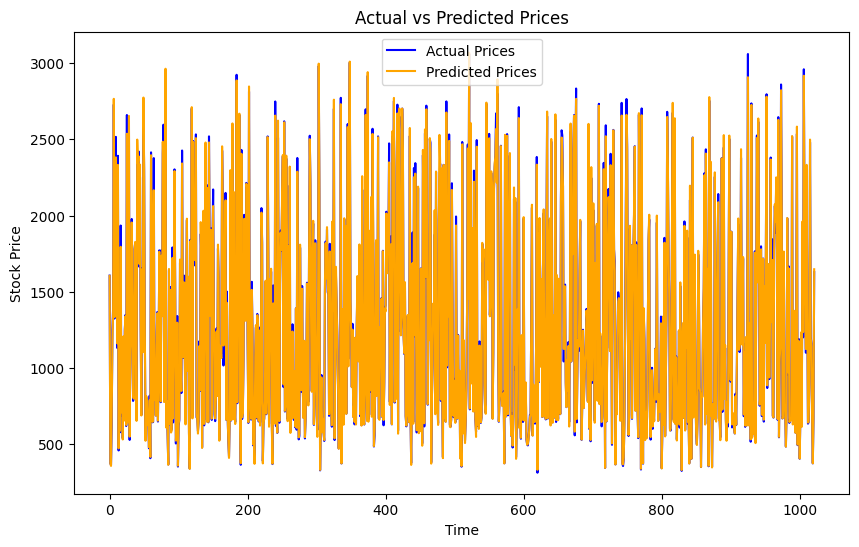

In [810]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt


# Ensure the Date column is in datetime format
data['Date'] = pd.to_datetime(data['Date'])


# Feature Engineering
data['Daily_Return'] = data['Close'].pct_change()
data['SMA_20'] = data['Close'].rolling(window=20).mean()
data['SMA_50'] = data['Close'].rolling(window=50).mean()
data['Volatility'] = data['Close'].rolling(window=20).std()

# Drop rows with NaN values generated from rolling calculations
data.dropna(inplace=True)
# Drop the last row with NaN target
data = data.dropna()

# Define Features (X) and Target (y)
features = ['Open', 'High', 'Low', 'Close', 'Volume', 'Daily_Return', 'SMA_20', 'SMA_50', 'Volatility']
X = data[features]
y = data['Target_Close']

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make Predictions
y_pred = rf_model.predict(X_test)

# Evaluate the Model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R2 Score: {r2}")

# Plot Actual vs Predicted Prices
plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label="Actual Prices", color="blue")
plt.plot(y_pred, label="Predicted Prices", color="orange")
plt.title("Actual vs Predicted Prices")
plt.xlabel("Time")
plt.ylabel("Stock Price")
plt.legend()
plt.show()


In [811]:
data.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,...,High-Low Range %,Daily Change %,Cumulative_Return,Volume_Change,SMA_50,SMA_200,Volatility,Target_Close,Daily_Return,SMA_20
199,2000-10-19,HDFC,EQ,458.75,456.7,480.0,453.15,474.00,477.40,468.87,...,5.925190,4.065395,0.626576,-0.113877,487.474,446.42500,17.883161,469.75,0.040654,453.3425
200,2000-10-20,HDFC,EQ,477.40,485.0,488.0,465.00,467.00,469.75,471.30,...,4.946237,-1.602430,0.600511,-0.277470,486.758,447.30625,14.782065,464.65,-0.016024,451.8450
201,2000-10-23,HDFC,EQ,469.75,469.0,472.0,463.10,463.75,464.65,465.53,...,1.921831,-1.085684,0.583135,0.013938,486.180,448.10925,13.479551,457.35,-0.010857,451.0275
202,2000-10-24,HDFC,EQ,464.65,462.0,467.0,453.10,453.50,457.35,461.12,...,3.067755,-1.571075,0.558262,-0.057968,485.406,448.93200,12.363928,462.20,-0.015711,450.1475
203,2000-10-25,HDFC,EQ,457.35,458.0,464.8,457.00,462.00,462.20,459.90,...,1.706783,1.060457,0.574787,0.263086,484.551,449.76075,12.587002,461.30,0.010605,451.0000


In [812]:
features=['Date','Close']

In [813]:
my_data=data[features]

In [814]:
my_data['Date']=pd.to_datetime(my_data['Date'])

<ipython-input-814-1a6f73018fcd>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  my_data['Date']=pd.to_datetime(my_data['Date'])


In [815]:
my_data

,Date,Close
199,2000-10-19,477.40
200,2000-10-20,469.75
201,2000-10-23,464.65
202,2000-10-24,457.35
203,2000-10-25,462.20
...,...,...
5300,2021-04-23,2497.35
5301,2021-04-26,2509.80
5302,2021-04-27,2518.40
5303,2021-04-28,2577.00


In [816]:
my_data.index=my_data['Date']

In [817]:
del my_data['Date']

<Axes: xlabel='Date'>

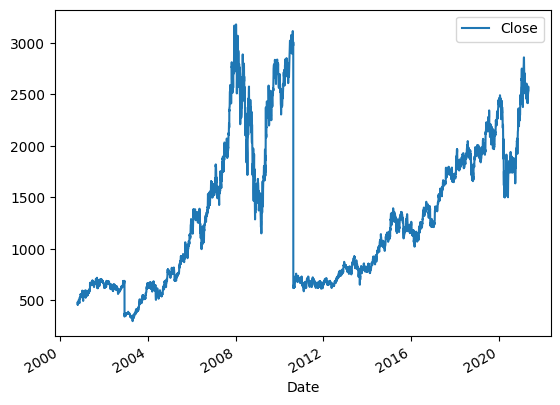

In [818]:
my_data.plot()

In [819]:
std_log=my_data.rolling(window=4).std()

In [820]:
mean_log=my_data.rolling(window=4).mean()

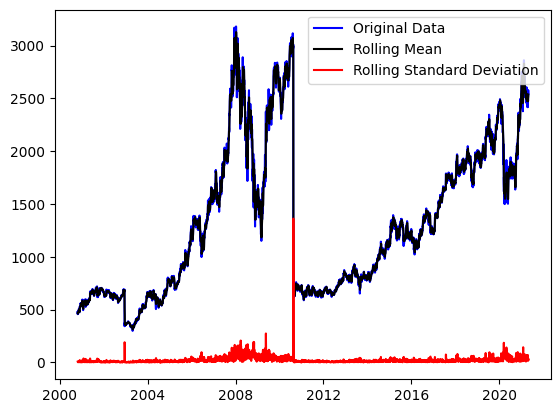

In [821]:
plt.plot(my_data,color='blue',label='Original Data')
plt.plot(mean_log,color='black',label='Rolling Mean')
plt.plot(std_log,color='red',label='Rolling Standard Deviation')
plt.legend(loc='best')

In [822]:
from statsmodels.tsa.stattools  import adfuller

In [823]:
#Augmented DickyFuller Test
result=adfuller(my_data['Close'])
keys=['test_statistics','p_value',"num_lags","num_observations","critical_values","AIC"]

In [824]:
for key,value in zip(keys,result):
  print(f"{key}:{value}")


test_statistics:-2.176762341672018
p_value:0.21478721525656186
num_lags:3
num_observations:5102
critical_values:{'1%': -3.431632358513106, '5%': -2.862106666289463, '10%': -2.567071636724501}
AIC:53882.416533710406


In [825]:
import numpy as np

In [826]:
first_log=np.log(my_data)

In [827]:
first_log.dropna()

,Close
Date,
2000-10-19,6.168355
2000-10-20,6.152201
2000-10-23,6.141284
2000-10-24,6.125449
2000-10-25,6.135998
...,...
2021-04-23,7.822985
2021-04-26,7.827958
2021-04-27,7.831379


<Axes: xlabel='Date'>

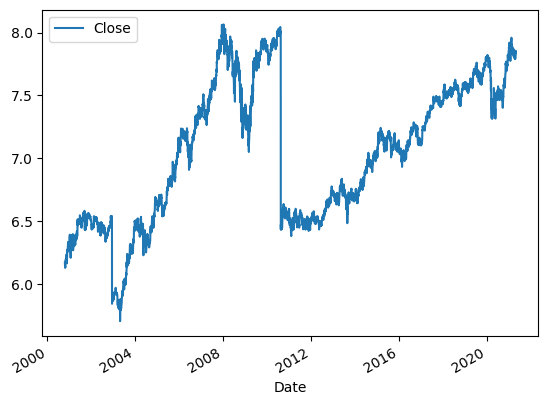

In [828]:
first_log.plot()

In [829]:
new_data=first_log-mean_log

Text(0.5, 1.0, 'Rolling mean and Standard deviation for log_scale data')

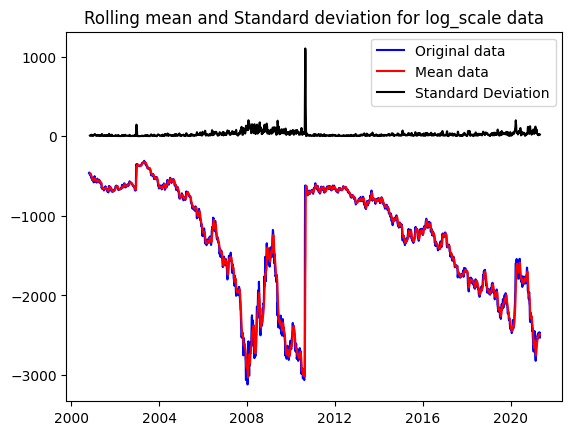

In [830]:
mean_log=new_data.rolling(window=12).mean()
std_log=new_data.rolling(window=12).std()

plt.plot(new_data,color='blue',label='Original data')
plt.plot(mean_log,color='red',label='Mean data')
plt.plot(std_log,color='black',label='Standard Deviation')

plt.legend(loc='best')
plt.title("Rolling mean and Standard deviation for log_scale data")

In [831]:
new_data

,Close
Date,
2000-10-19,NaN
2000-10-20,NaN
2000-10-23,NaN
2000-10-24,-461.162051
2000-10-25,-457.351502
...,...
2021-04-23,-2463.502015
2021-04-26,-2467.859542
2021-04-27,-2493.481121


In [832]:
from statsmodels.tsa.stattools import acf,pacf
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

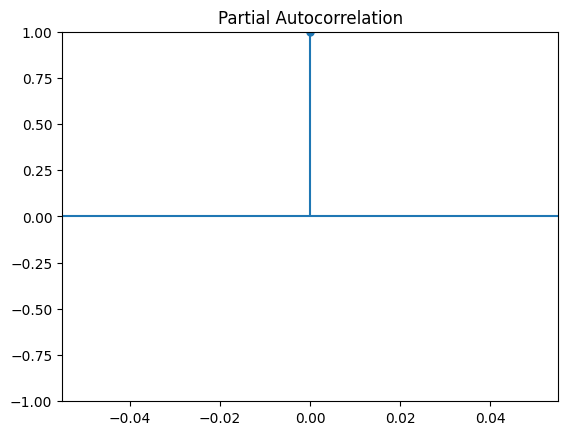

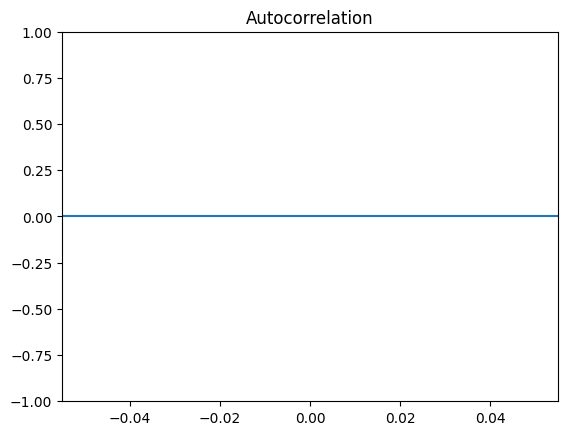

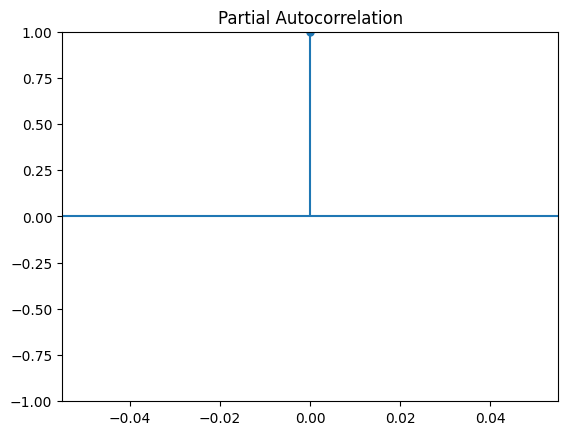

In [833]:
acf_values=acf(new_data)
plot_acf(new_data)
pacf_values=pacf(new_data,nlags=10)
plot_pacf(new_data)

In [834]:
from statsmodels.tsa.arima.model import ARIMA

In [835]:
train=new_df.iloc[:120]['Close']

In [836]:
test=new_df.iloc[120:]

In [837]:
model=ARIMA(train,order=(1,0,2))

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)


In [838]:
model_fit=model.fit()

In [839]:
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                  120
Model:                 ARIMA(1, 0, 2)   Log Likelihood                -557.457
Date:                Sat, 07 Dec 2024   AIC                           1124.913
Time:                        09:20:52   BIC                           1138.851
Sample:                             0   HQIC                          1130.573
                                - 120                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       1238.2470     48.161     25.711      0.000    1143.853    1332.641
ar.L1          0.9717      0.026     37.921      0.000       0.921       1.022
ma.L1         -0.0302      0.102     -0.295      0.7

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


<Axes: xlabel='Date'>

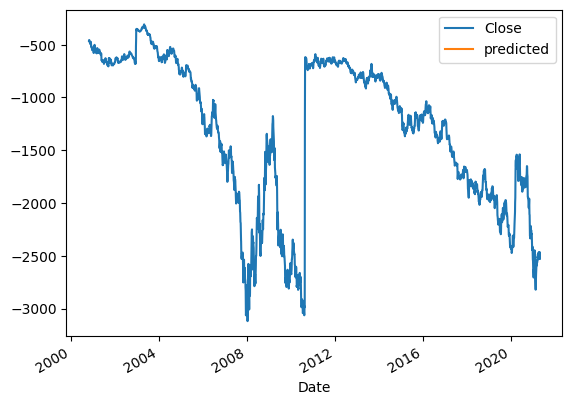

In [840]:
new_data['predicted']=model_fit.predict(start=len(train),end=len(train) + len(test)-1,dynamic=True)
new_data[['Close','predicted']].plot()

In [841]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [842]:
model=SARIMAX(train,order=(1,0,2),seasonal_order=(1,0,2,12))
model_fit=model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


<Axes: xlabel='Date'>

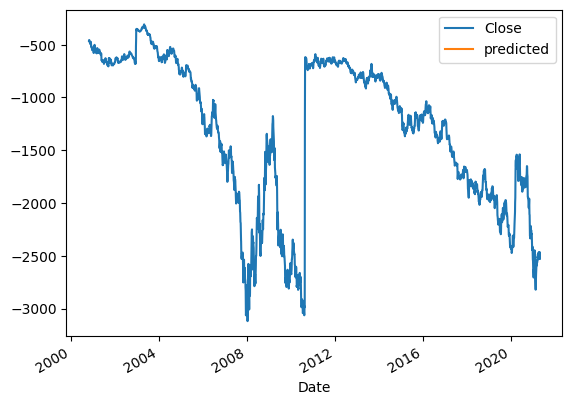

In [843]:
new_data['predicted']=model_fit.predict(start=len(train),end=len(train) + len(test)-1,dynamic=True)
new_data[['Close','predicted']].plot()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


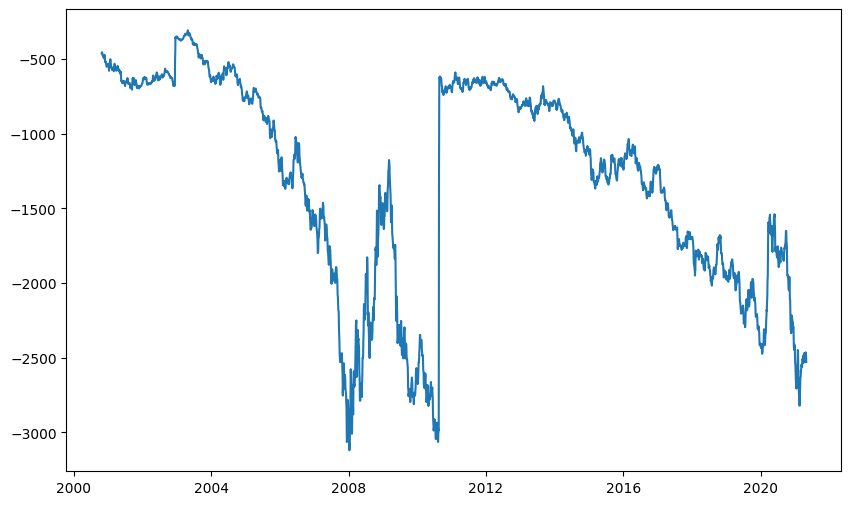

In [844]:
forecast=model_fit.forecast(steps=60)
plt.figure(figsize=(10,6))
plt.plot(new_data.index,new_data['Close'],label='Original Data')

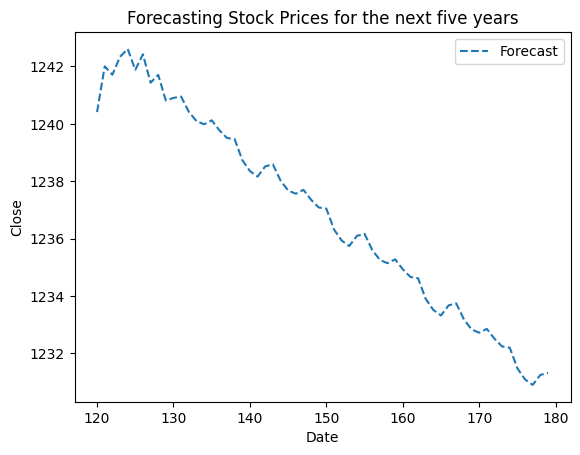

In [845]:
plt.plot(forecast.index,forecast,label='Forecast',linestyle='--')
plt.xlabel("Date")
plt.ylabel("Close")
plt.title("Forecasting Stock Prices for the next five years")
plt.legend()